# 311 Service Requests for Damaged Trees

In [ ]:
# first import all the packages we'll need

# pandas for reading in and manipulating data
import pandas as pd
pd.set_option('display.max_columns', 500)

# making graphs with matplot lib
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size']=18
plt.rcParams['axes.labelsize']=22
plt.rcParams.update({'legend.fontsize': 12})

# mapping package based on leaflet
import folium

# working with dates
import datetime as dt

## 311 Service Requests

Download the data from NYC Open Data(https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)

The full data is pretty big (over 8 gigs of data), but it's easy enough to first filter on Complaint Type = Damaged Trees and Create Date > 1/1/2015 (click on the blue 'filter' tab on the right side of the webiste to do this).

Read into a Dataframe:

In [2]:
sreq = pd.read_csv('data/311SR/311_Service_Requests_damaged_trees.csv')

Here's a sample of the first few lines of the dataset:

In [14]:
print sreq.shape
sreq.head()

(33618, 53)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,33729605,06/30/2016 10:04:55 AM,07/06/2016 08:13:48 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10469,909 ARNOW AVENUE,ARNOW AVENUE,BRONXWOOD AVENUE,RADCLIFF AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,07/05/2016 10:04:55 AM,The Department of Parks and Recreation perform...,07/06/2016 08:13:48 AM,11 BRONX,BRONX,1022671,255465,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867783,-73.861087,"(40.867783355341494, -73.86108684070715)"
1,31593561,09/22/2015 10:29:56 AM,10/13/2015 11:01:42 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch Cracked and Will Fall,Street,11364,53-48 BELL BOULEVARD,BELL BOULEVARD,LUKE PLACE,56 AVENUE,NaN,NaN,ADDRESS,OAKLAND GARDENS,NaN,NaN,Closed,10/01/2015 07:17:23 AM,The Department of Parks and Recreation inspect...,10/13/2015 11:01:42 AM,11 QUEENS,QUEENS,1049767,213247,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.751748,-73.763532,"(40.75174757106758, -73.76353224937567)"
2,31594659,09/22/2015 09:05:40 AM,11/27/2015 12:25:29 PM,DPR,Department of Parks and Recreation,Damaged Tree,Tree Alive - in Poor Condition,Street,11429,223-29 113 DRIVE,113 DRIVE,223 STREET,225 STREET,NaN,NaN,ADDRESS,QUEENS VILLAGE,NaN,NaN,Closed,10/08/2015 09:14:12 AM,The condition was inspected and it was determi...,11/27/2015 12:25:29 PM,13 QUEENS,QUEENS,1058011,195320,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702478,-73.733974,"(40.702477623959254, -73.7339741977541)"
3,30983432,07/01/2015 07:15:45 PM,07/07/2015 09:59:07 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11209,NaN,NaN,NaN,NaN,RIDGE BOULEVARD,SHORE ROAD,INTERSECTION,BROOKLYN,NaN,NaN,Closed,07/10/2015 08:24:24 AM,The condition was inspected and it was determi...,07/07/2015 09:59:07 AM,10 BROOKLYN,BROOKLYN,973487,164134,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.617180,-74.038768,"(40.61717981585385, -74.03876808356814)"
4,33731888,06/30/2016 08:20:00 PM,07/06/2016 11:20:50 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11378,53-43 64 STREET,64 STREET,63 STREET,53 DRIVE,NaN,NaN,ADDRESS,MASPETH,NaN,NaN,Closed,07/09/2016 08:22:11 AM,The Department of Parks and Recreation visited...,07/06/2016 11:20:50 AM,05 QUEENS,QUEENS,1011645,205308,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.730157,-73.901157,"(40.73015729009575, -73.90115651402218)"


let's see how many different types of Descriptors there are for Damaged Tree complaints:

In [4]:
sreq.groupby('Descriptor').count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Descriptor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Branch Cracked and Will Fall,7538,7538,4849,7538,7538,7538,7229,7518,6864,6864,6559,6559,573,573,7427,7519,3,0,7538,7534,7523,7129,7538,7538,7421,7421,7538,7538,7538,7538,7444,7444,7538,7538,7538,7538,7538,6095,0,0,0,0,0,0,0,0,0,0,0,7421,7421,7421
Branch or Limb Has Fallen Down,14563,14563,9316,14563,14563,14563,13798,14520,12729,12729,11974,11970,1697,1697,14394,14520,10,0,14563,14557,14544,13765,14563,14563,14380,14380,14563,14563,14563,14563,14443,14443,14563,14562,14563,14563,14563,12414,0,0,0,0,0,0,0,0,0,0,0,14380,14380,14380
Entire Tree Has Fallen Down,4550,4550,3110,4550,4550,4550,4143,4530,3554,3554,3165,3165,891,891,4444,4530,13,0,4550,4549,4544,4244,4550,4550,4441,4441,4550,4550,4550,4550,4461,4461,4550,4550,4550,4550,4550,3467,0,0,0,0,0,0,0,0,0,0,0,4441,4441,4441
Tree Alive - in Poor Condition,3356,3356,2149,3356,3356,3356,2051,3355,3275,3275,1974,1974,63,63,3341,3355,0,0,3356,3348,3355,3024,3356,3356,3341,3341,3356,3356,3356,3356,3343,3343,3356,3356,3356,3356,3356,2218,0,0,0,0,0,0,0,0,0,0,0,3341,3341,3341
Tree Leaning/Uprooted,3073,3073,2121,3073,3073,3073,2659,3068,2797,2797,2390,2390,252,252,3051,3069,5,0,3073,3066,3068,2841,3073,3073,3047,3047,3073,3073,3073,3073,3052,3052,3073,3073,3073,3073,3073,2366,0,0,0,0,0,0,0,0,0,0,0,3047,3047,3047
Tree Trunk Split,538,538,373,538,538,538,428,536,486,486,377,377,45,45,530,536,0,0,538,538,538,508,538,538,530,530,538,538,538,538,532,532,538,538,538,538,538,454,0,0,0,0,0,0,0,0,0,0,0,530,530,530


this can also be plotted:

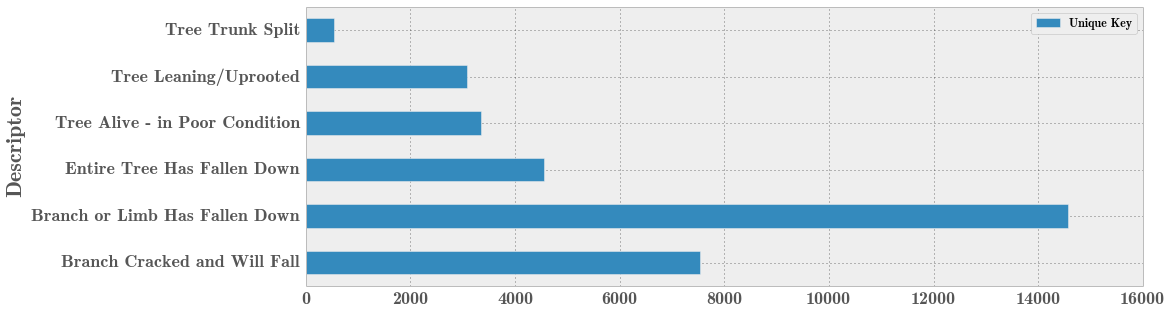

In [74]:
sreq.groupby('Descriptor').count()[['Unique Key']].plot(kind ='barh')

## Requests over time

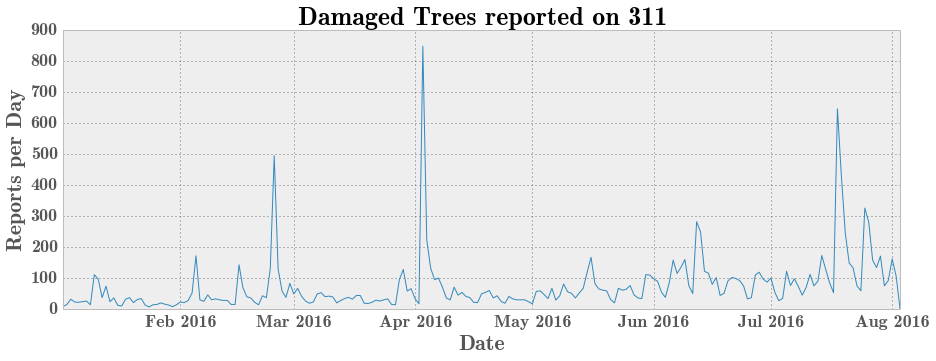

In [39]:
# get the correct date formatting
sreq['date']=pd.to_datetime(sreq['Created Date']).apply(dt.datetime.date)

# plot requests in 2016
sreq2016 = sreq[sreq.date>dt.date(2016,1,1)]
sreq2016.groupby('date').count()['Unique Key'].plot()
plt.xlabel('Date')
plt.ylabel('Reports per Day')
plt.title('Damaged Trees reported on 311')

In [73]:
# days where there were more than 200 requests
df = sreq2016.groupby('date').count()['Unique Key']
df[df>200]

date
2016-02-25    494
2016-04-03    847
2016-04-04    222
2016-06-12    281
2016-06-13    248
2016-07-18    645
2016-07-19    430
2016-07-20    245
2016-07-25    325
2016-07-26    280
Name: Unique Key, dtype: int64

## Map
Map where the most recent damaged tree requests are

In [71]:
# picking out the most recent requests, after July 1
recent = sreq[sreq.date>dt.date(2016,7,1)]
recent.shape

(4530, 54)

In [70]:
# create map background
m = folium.Map([40.78,-73.96], zoom_start=13, tiles='cartodbpositron')

# add markers where there is a damaged tree service request
for name, row in recent.dropna(subset=['Longitude','Latitude']).iterrows():
    folium.Marker([row['Latitude'],row['Longitude']]).add_to(m)

# show map        
m
